In [1]:
#!pip install shap

In [1]:
import pandas as pd
#from datetime import timedelta
from pycaret.classification import *
import shap

In [3]:
df = pd.read_parquet('./data/final_clin_wo_cluster.parquet')

In [12]:
# df_w_sepsis3 = df

In [4]:
df.columns.tolist()

['stay_id',
 'subject_id',
 'hadm_id',
 'first_careunit',
 'last_careunit',
 'admission_type',
 'admission_location',
 'insurance',
 'language',
 'marital_status',
 'race',
 'hospital_expire_flag',
 'gender',
 'anchor_age',
 'anchor_year',
 'anchor_year_group',
 'pao2fio2ratio_novent_avg_d1',
 'pao2fio2ratio_vent_avg_d1',
 'rate_epinephrine_avg_d1',
 'rate_norepinephrine_avg_d1',
 'rate_dopamine_avg_d1',
 'rate_dobutamine_avg_d1',
 'platelet_min_d1',
 'creatinine_max_d1',
 'bilirubin_max_d1',
 'respiration_d1',
 'coagulation_d1',
 'liver_d1',
 'cardiovascular_d1',
 'cns_d1',
 'renal_d1',
 'preiculos_d1',
 'preiculos_score_d1',
 'gcs_d1',
 'gcs_score_d1',
 'heartrate_d1',
 'heart_rate_score_d1',
 'meanbp_d1',
 'mbp_score_d1',
 'resprate_d1',
 'resp_rate_score_d1',
 'temp_d1',
 'temp_score_d1',
 'urineoutput_d1',
 'urineoutput_score_d1',
 'mechvent_d1',
 'mechvent_score_d1',
 'electivesurgery_d1',
 'electivesurgery_score_d1',
 'pao2fio2ratio_novent_avg_d2',
 'pao2fio2ratio_vent_avg_d2',


In [5]:
df.drop(['stay_id', 'subject_id', 'hadm_id','sepsis3'], axis=1, inplace=True)

In [6]:
# exp1 = setup(df, target = 'hospital_expire_flag', numeric_features=numerical_variables, categorical_features=categorical_variables, numeric_imputation='median', fix_imbalance=True, session_id=42)
exp2 = setup(df, target = 'hospital_expire_flag', numeric_imputation='median', fix_imbalance=True, session_id=42)

,Description,Value
0,session_id,42
1,Target,hospital_expire_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22440, 112)"
5,Missing Values,True
6,Numeric Features,57
7,Categorical Features,54
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8630,0.8558,0.3805,0.6592,0.4819,0.4095,0.4304,0.8920
gbc,Gradient Boosting Classifier,0.8596,0.8498,0.3384,0.6594,0.4467,0.3758,0.4035,5.8270
xgboost,Extreme Gradient Boosting,0.8578,0.8434,0.3862,0.6228,0.4763,0.3993,0.4148,5.5660
rf,Random Forest Classifier,0.8533,0.8294,0.2393,0.6788,0.3534,0.2914,0.3425,0.9290
et,Extra Trees Classifier,0.8519,0.8295,0.2491,0.6537,0.3600,0.2950,0.3395,0.9890
ada,Ada Boost Classifier,0.8470,0.8198,0.3730,0.5672,0.4490,0.3647,0.3760,1.0950
dummy,Dummy Classifier,0.8324,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1150
dt,Decision Tree Classifier,0.7846,0.6317,0.4018,0.3687,0.3842,0.2540,0.2546,0.3060
lda,Linear Discriminant Analysis,0.7715,0.8392,0.7395,0.4021,0.5207,0.3876,0.4187,0.4330
ridge,Ridge Classifier,0.7714,0.0000,0.7402,0.4020,0.5208,0.3877,0.4190,0.1200


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [8]:
# Rank: 1st, AUC
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8581,0.8621,0.3764,0.6266,0.4703,0.3942,0.4113
1,0.8727,0.8723,0.4030,0.7114,0.5146,0.4477,0.4717
2,0.8593,0.8710,0.3346,0.6567,0.4433,0.3724,0.4002
3,0.8555,0.8675,0.3916,0.6059,0.4758,0.3964,0.4091
4,0.8714,0.8559,0.4242,0.6914,0.5258,0.4563,0.4746
5,0.8612,0.8462,0.3826,0.6474,0.4810,0.4069,0.4257
6,0.8701,0.8397,0.3864,0.7083,0.5000,0.4327,0.4590
7,0.8643,0.8758,0.3612,0.6786,0.4715,0.4018,0.4282
8,0.8580,0.8314,0.3460,0.6408,0.4494,0.3761,0.3997


In [41]:
#tuned_lgbm = tune_model(lgbm, optimize='AUC')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


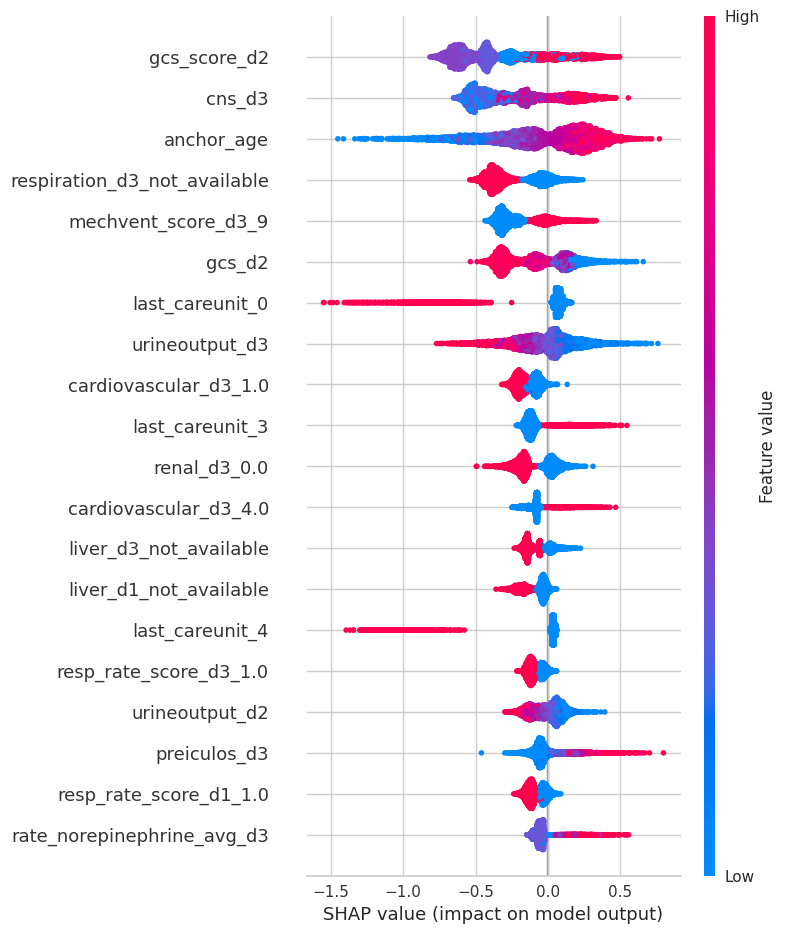

In [9]:
interpret_model(lgbm)

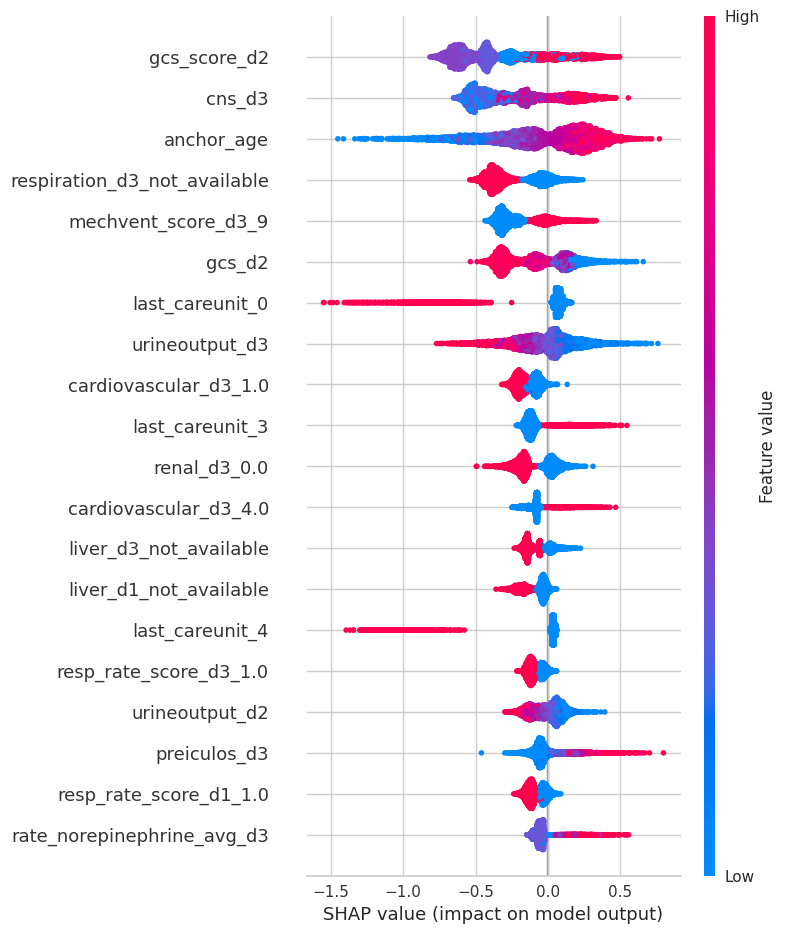

In [10]:
interpret_model(lgbm, plot='summary')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


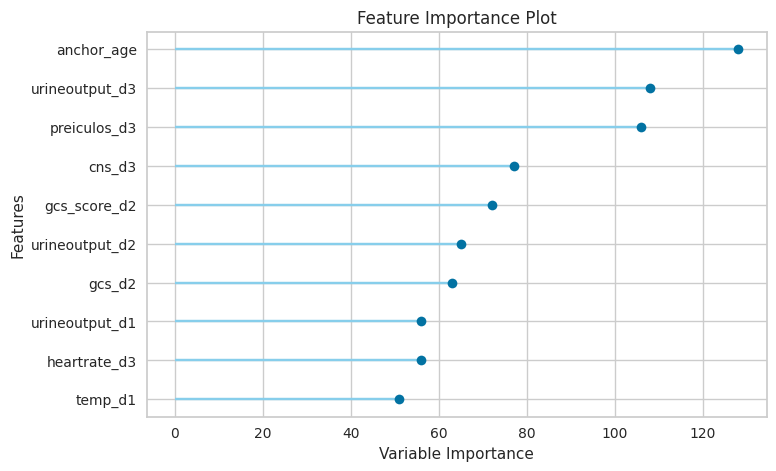

In [11]:
plot_model(lgbm, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


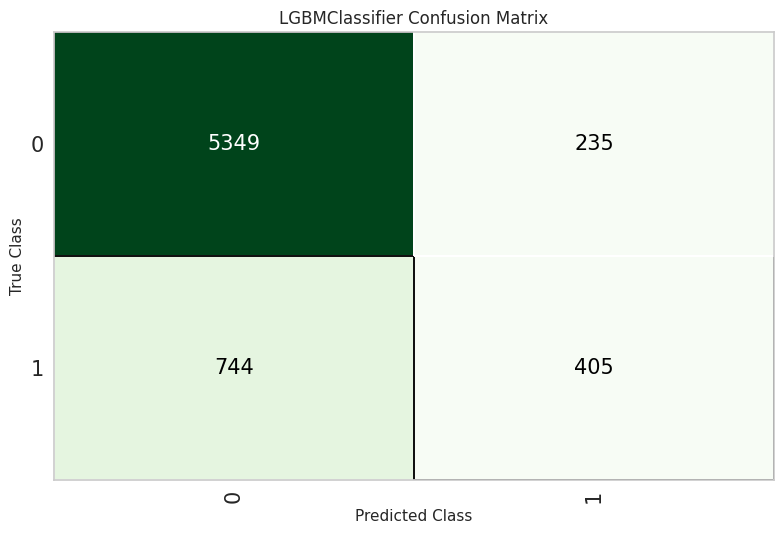

In [12]:
plot_model(lgbm, plot = 'confusion_matrix')

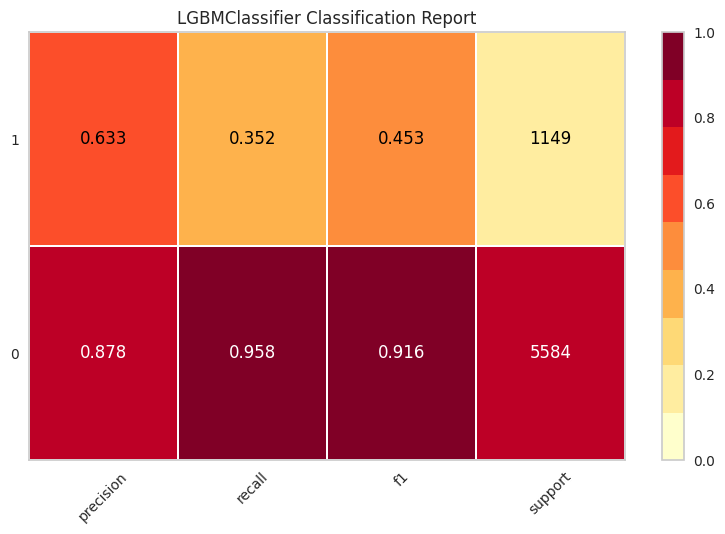

In [13]:
plot_model(lgbm, plot = 'class_report')

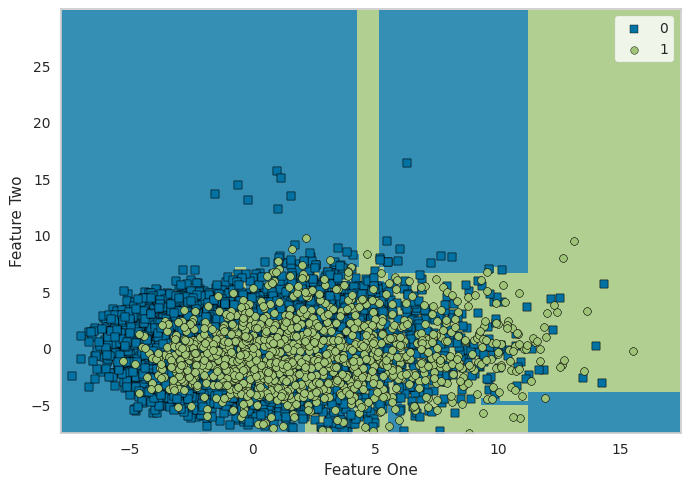

In [14]:
plot_model(lgbm, plot='boundary')

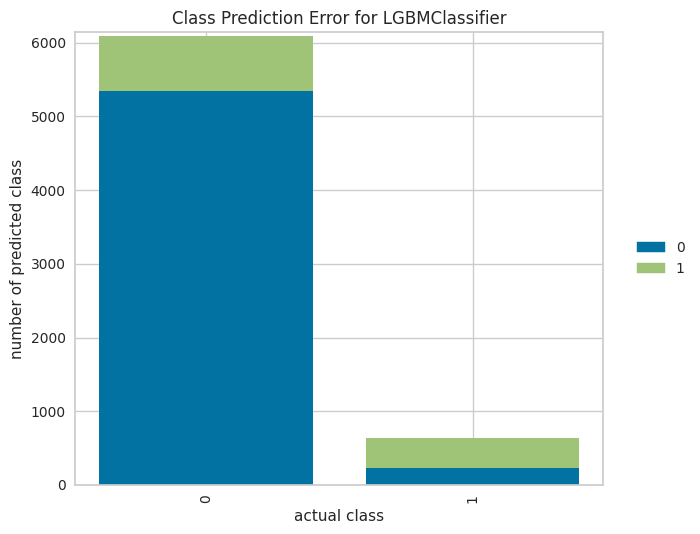

In [15]:
plot_model(lgbm, plot = 'error')

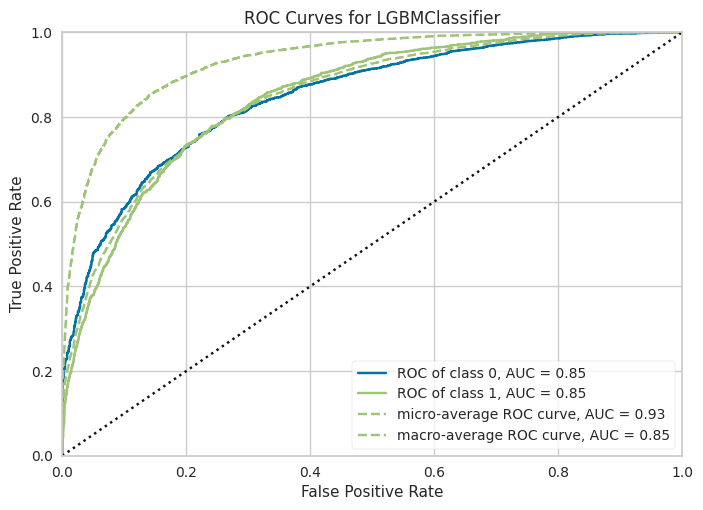

In [16]:
plot_model(lgbm, plot='auc')

In [17]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8546,0.8478,0.3525,0.6328,0.4528,0.3767,0.3981


,race,anchor_age,anchor_year,pao2fio2ratio_novent_avg_d1,pao2fio2ratio_vent_avg_d1,rate_epinephrine_avg_d1,rate_norepinephrine_avg_d1,rate_dopamine_avg_d1,rate_dobutamine_avg_d1,platelet_min_d1,...,urineoutput_score_d3_1.0,urineoutput_score_d3_10.0,urineoutput_score_d3_5.0,urineoutput_score_d3_8.0,urineoutput_score_d3_not_available,mechvent_score_d3_9,electivesurgery_d3_1,hospital_expire_flag,Label,Score
0,28.0,64.0,2192.0,138.333328,253.746796,0.030032,0.200602,5.495194,4.378946,203.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7892
1,28.0,69.0,2155.0,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,210.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9842
2,28.0,53.0,2179.0,225.000000,388.333344,0.030032,0.105583,5.495194,4.378946,215.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9230
3,28.0,60.0,2145.0,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,385.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9595
4,27.0,74.0,2134.0,225.000000,253.746796,0.030032,0.105583,3.346423,4.378946,140.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,28.0,68.0,2155.0,224.444443,190.097229,0.030032,0.105583,5.495194,4.378946,254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9547
6729,28.0,87.0,2174.0,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,178.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9349
6730,28.0,74.0,2114.0,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,85.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8720
6731,28.0,80.0,2149.0,326.000000,327.000000,0.030032,0.105583,5.495194,4.378946,148.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8995


In [19]:
final_lgbm = finalize_model(lgbm)

In [20]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [21]:
save_model(lgbm, "models/lgbm_full_wo_cluster")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='hospital_expire_flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

In [ ]:
# new_prediction = predict_model(Final Model, data=data_unseen)
# new_prediction.head()

In [ ]:
# saved_final_model = load_model('Final Model')

In [ ]:
import matplotlib.pyplot as plt
imp = sorted(list(zip(tuned_cat.feature_names_, et.feature_importances_)), key= lambda x:x[1], reverse=True)
names = [x[0] for x in imp]
values = [x[1] for x in imp]
plt.barh(names[:5], values[:5])

In [ ]:
imp = sorted(list(zip(tuned_cat.feature_names_, et.feature_importances_)), key= lambda x:x[1], reverse=True)
print("\n".join([": ".join([x[0], str(round(x[1], 4))]) for x in imp]))

In [ ]:
file_path
with open(file_path, 'w') as f: